# Habituation Dishabituation Data

In [1]:
import tdt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
# Get the root directory (adjust according to your folder structure)
root_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))  # Go up one directory to P2_Code

# Add the root directory to sys.path
sys.path.append(root_dir)

from group_tdt_class import *
from experiment_functions import *


In [2]:
experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\mpfc"
csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\mpfc_csvs"
brain_region = '#e06928'


# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\nac"
# csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\nac_csvs"
# brain_region = '#1a58af'

In [3]:
# Define the time segments to remove for specific subjects
time_segments_to_remove = {
    'n6': [(150,200)],
    'n7': [(90, 130)]
}


In [4]:
group_data = GroupTDTData(experiment_path, csv_base_path)
# Batch process the data, removing the specified time segments for subjects
group_data.batch_process(time_segments_to_remove=time_segments_to_remove)

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\mpfc\p1-240516-064158\Notes.txt
read from t=0s to t=1547.64s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\mpfc\p2-240516-071921\Notes.txt
read from t=0s to t=1556.22s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\mpfc\p3-240516-075659\Notes.txt
read from t=0s to t=1538.85s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\mpfc\p4-240516-083255\Notes.txt
read from t=0s to t=1773.98s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\mpfc\p5-240821-092649\Notes.txt
read from t=0s to t=1326.46s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\mpfc\p6-240821-103616\Notes.txt
read from t=0s to t=1322.66s
Found Synapse no

In [5]:
group_data.hab_dishab_processing()

Hab_Dishab Processing p1-240516-064158...
Hab_Dishab Processing p2-240516-071921...
Hab_Dishab Processing p3-240516-075659...
Hab_Dishab Processing p4-240516-083255...
Hab_Dishab Processing p5-240821-092649...
Hab_Dishab Processing p6-240821-103616...
Hab_Dishab Processing p7-240821-111323...
Hab_Dishab Processing p8-240821-121933...


## Total duration

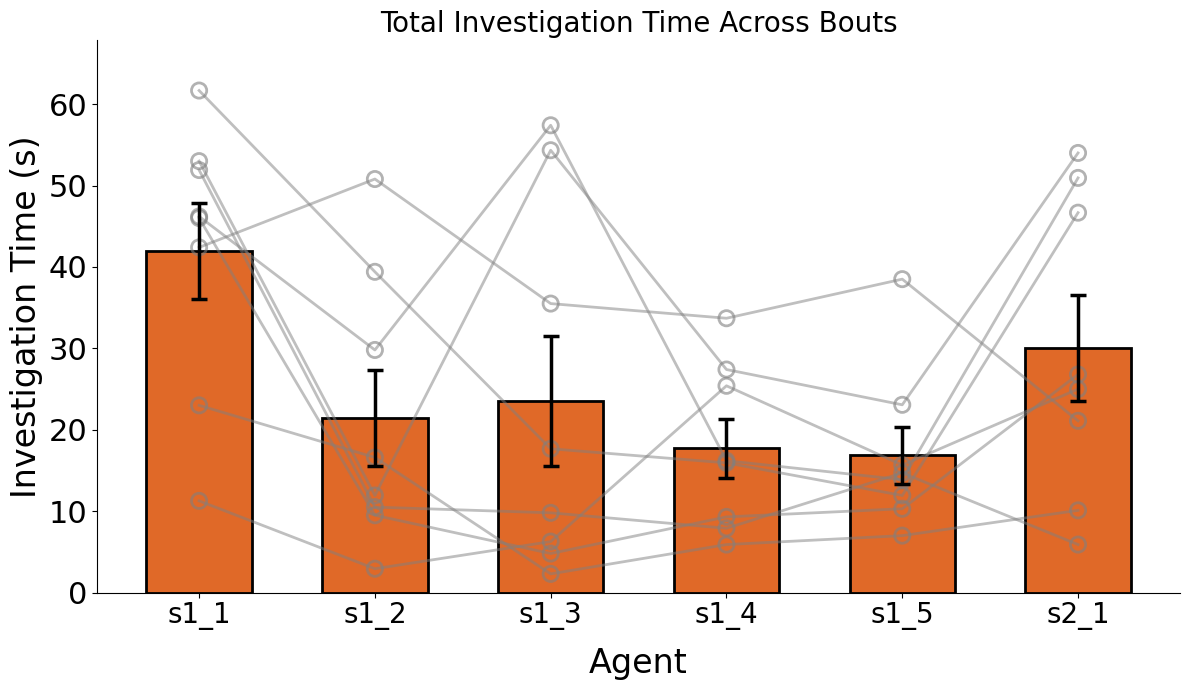

In [6]:
bouts = ['s1_1', 's1_2', 's1_3', 's1_4', 's1_5','s2_1']
avg_inv_tot_duration_df = extract_total_behavior_durations(group_data=group_data, bouts=bouts, behavior = 'Investigation')

# custom_xtick_labels = ['i1','i1','i1','i1''i1','i1','i2']
# avg_inv_tot_duration_df
plot_y_across_bouts_gray(avg_inv_tot_duration_df, 'Total Investigation Time Across Bouts','Investigation Time (s)',bar_color=brain_region)

## Mean DA During 1st Investigation

In [7]:
inv_1st_mean_df = extract_nth_behavior_mean_da(group_data=group_data, bouts=bouts, behavior='Investigation', n =1)

plot_y_across_bouts(inv_1st_mean_df, 'Mean DA during 1st Investigation Across Bouts','Mean DA (zscored dff)',custom_xtick_labels=custom_xtick_labels,bar_color=brain_region)

NameError: name 'custom_xtick_labels' is not defined

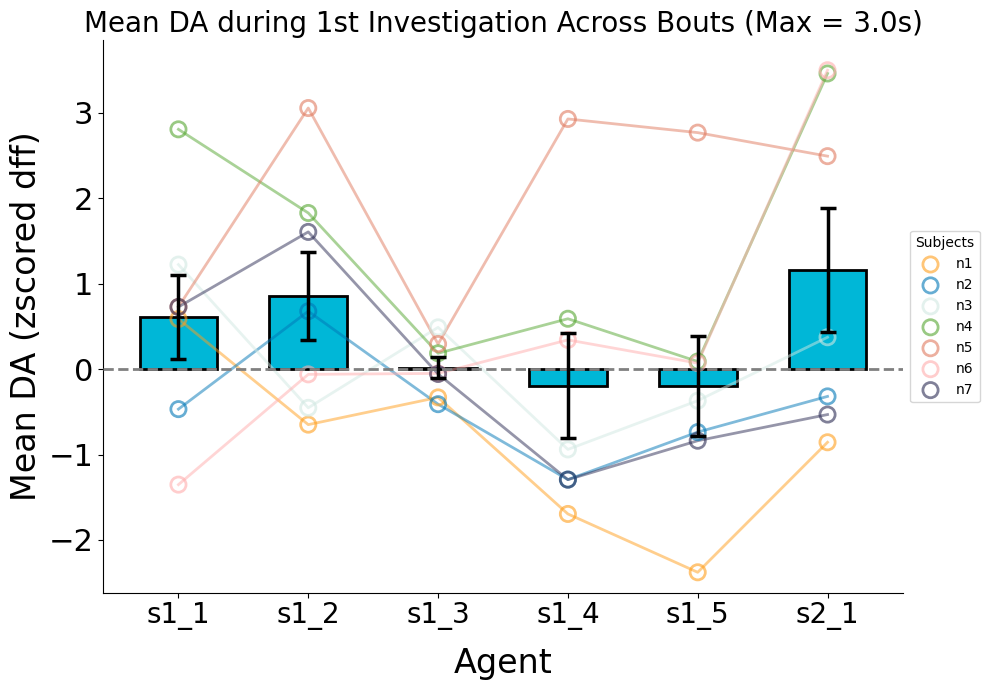

In [8]:
inv_1st_mean_df = extract_nth_behavior_mean_da_corrected(group_data=group_data, bouts=bouts, behavior='Investigation', n =1, max_duration=3.0)

plot_y_across_bouts(inv_1st_mean_df, 'Mean DA during 1st Investigation Across Bouts (Max = 3.0s)','Mean DA (zscored dff)',custom_xtick_labels=custom_xtick_labels,bar_color=brain_region)


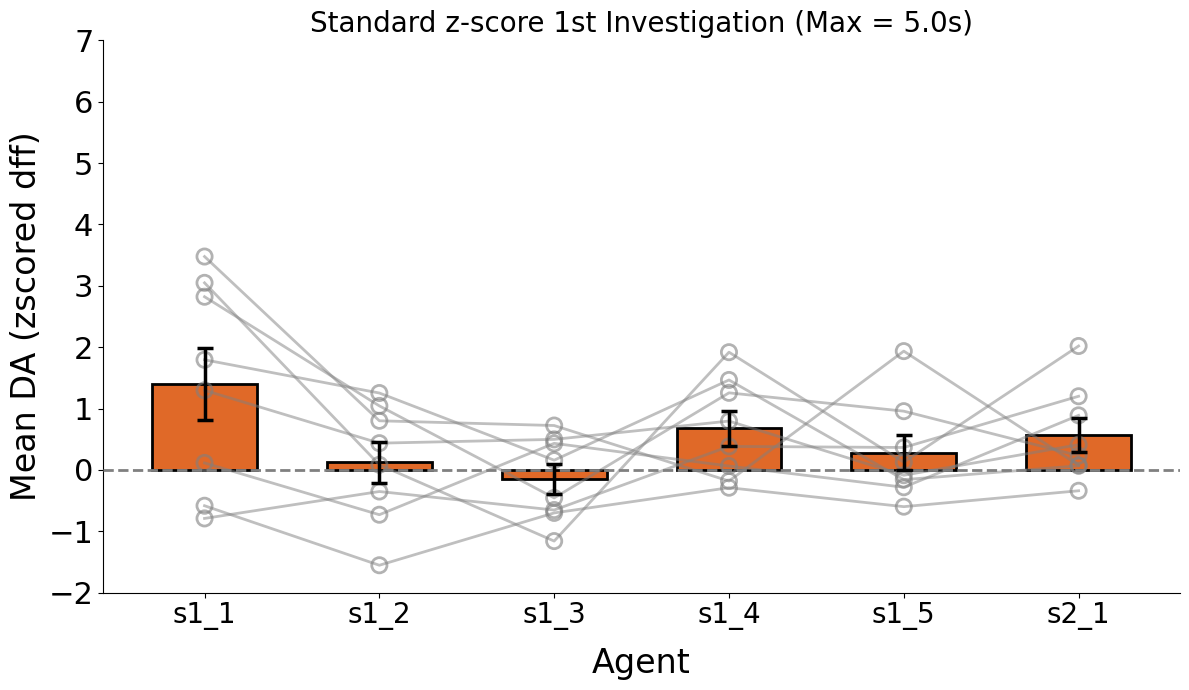

In [8]:
inv_1st_mean_df = extract_nth_behavior_mean_da_corrected(group_data=group_data, bouts=bouts, behavior='Investigation', n =1, max_duration=5.0)

plot_y_across_bouts_gray(inv_1st_mean_df, 'Standard z-score 1st Investigation (Max = 5.0s)','Mean DA (zscored dff)',bar_color=brain_region,ylim=(-2,7))


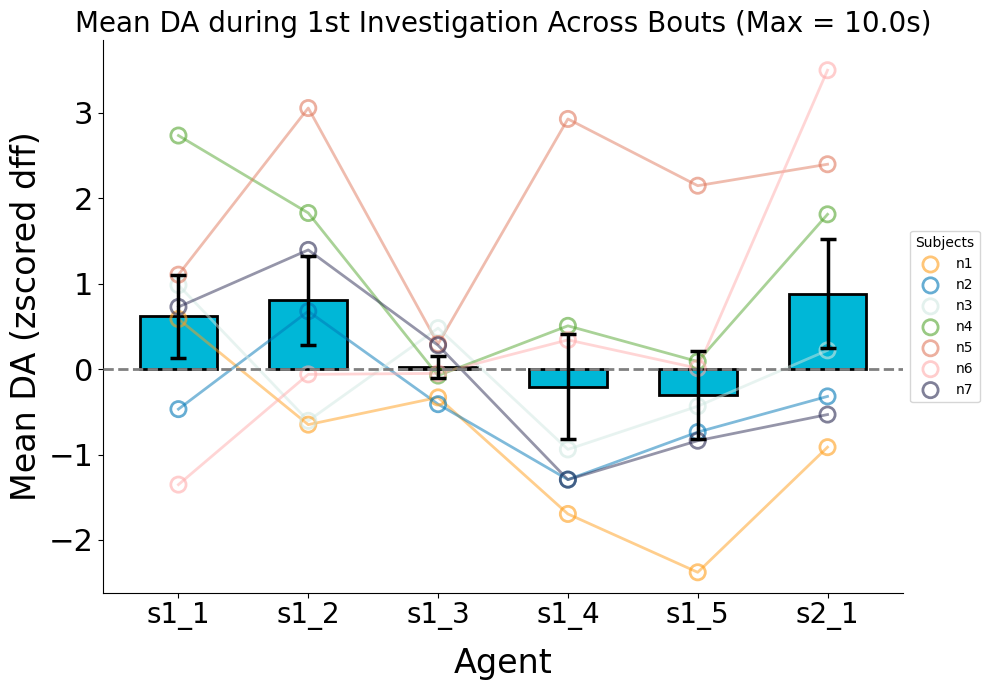

In [10]:
inv_1st_mean_df = extract_nth_behavior_mean_da_corrected(group_data=group_data, bouts=bouts, behavior='Investigation', n =1, max_duration=10.0)

plot_y_across_bouts(inv_1st_mean_df, 'Mean DA during 1st Investigation Across Bouts (Max = 10.0s)','Mean DA (zscored dff)')


## PETHC CODE

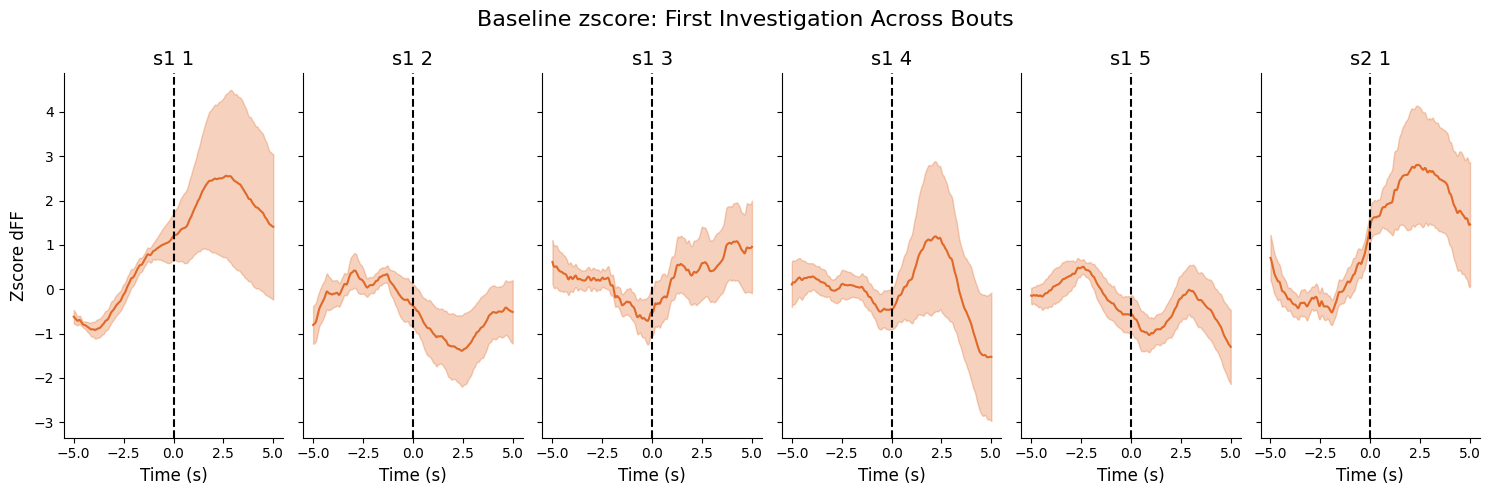

In [9]:
group_data.compute_first_bout_peth_all_blocks(behavior_name='Investigation',bouts= bouts, pre_time=5, post_time=5)
group_data.plot_peth_for_bouts(signal_type='zscore', error_type='sem', bouts=bouts, title='Baseline zscore: First Investigation Across Bouts',color=brain_region)


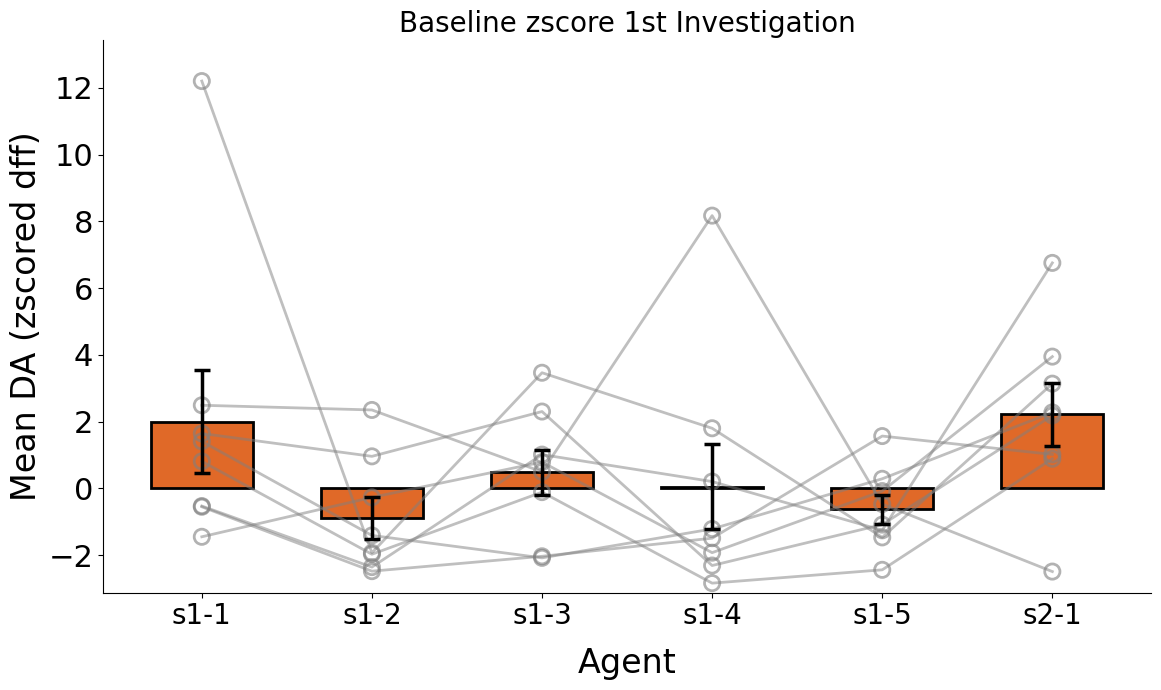

In [13]:
custom_labels = ['s1-1','s1-2','s1-3','s1-4','s1-5','s2-1']
df = extract_nth_behavior_mean_peth(group_data=group_data, bouts=bouts,behavior='Investigation',n=1, windows=[(0, 5)])
plot_y_across_bouts_gray(df,title='Baseline zscore 1st Investigation',ylabel='Mean DA (zscored dff)', custom_xtick_labels = custom_labels,bar_color=brain_region)#,ylim=(-2,7))


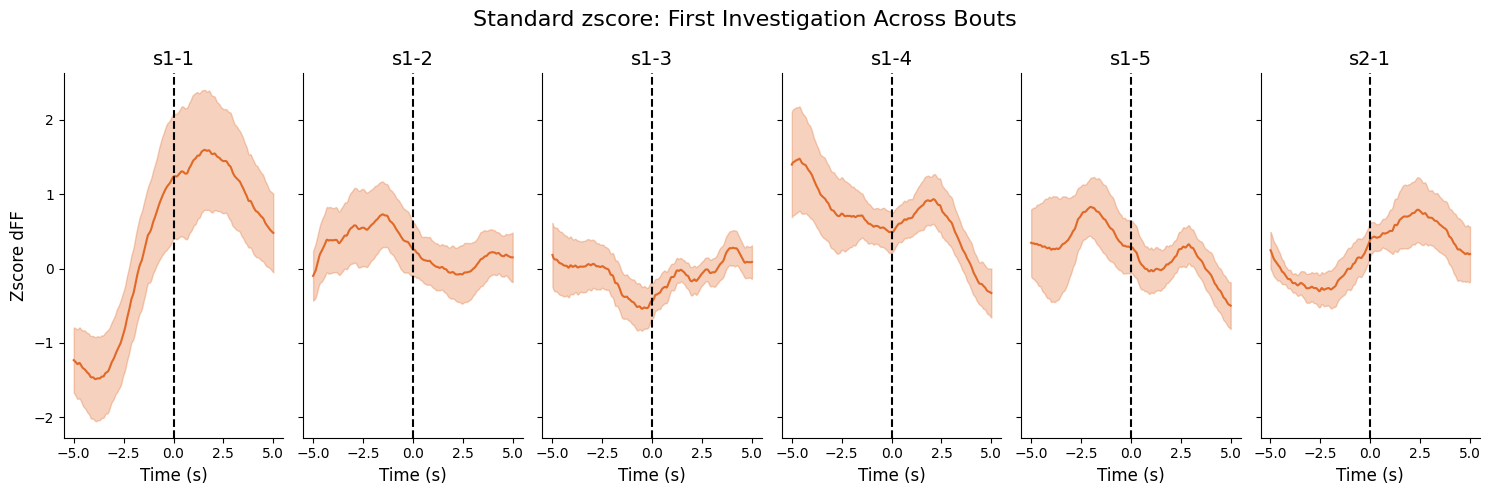

In [11]:
group_data.compute_first_bout_peth_all_blocks_standard(behavior_name='Investigation',bouts=bouts, pre_time=5, post_time=5)
group_data.plot_peth_for_bouts(signal_type='zscore', error_type='sem', bouts=bouts, title='Standard zscore: First Investigation Across Bouts', color=brain_region, custom_xtick_labels=custom_labels)

## All Investigations

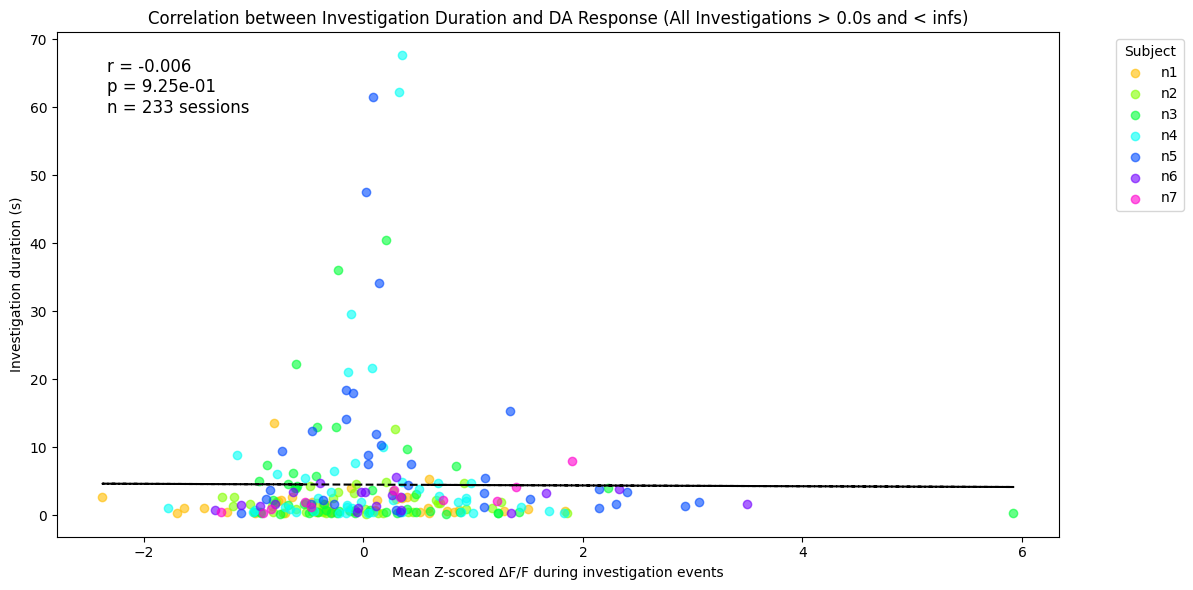

In [13]:
group_data.plot_all_behavior_vs_dff_all(behavior_name='Investigation', min_duration=0.0, max_duration=np.inf)

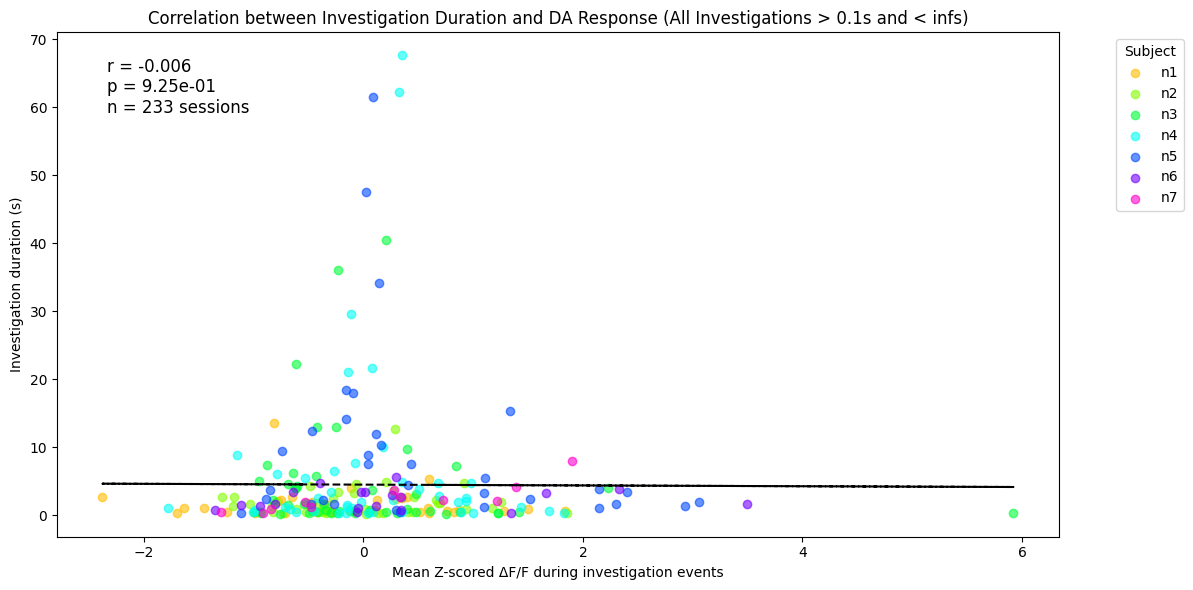

In [14]:
group_data.plot_all_behavior_vs_dff_all(behavior_name='Investigation', min_duration=0.1, max_duration=np.inf)

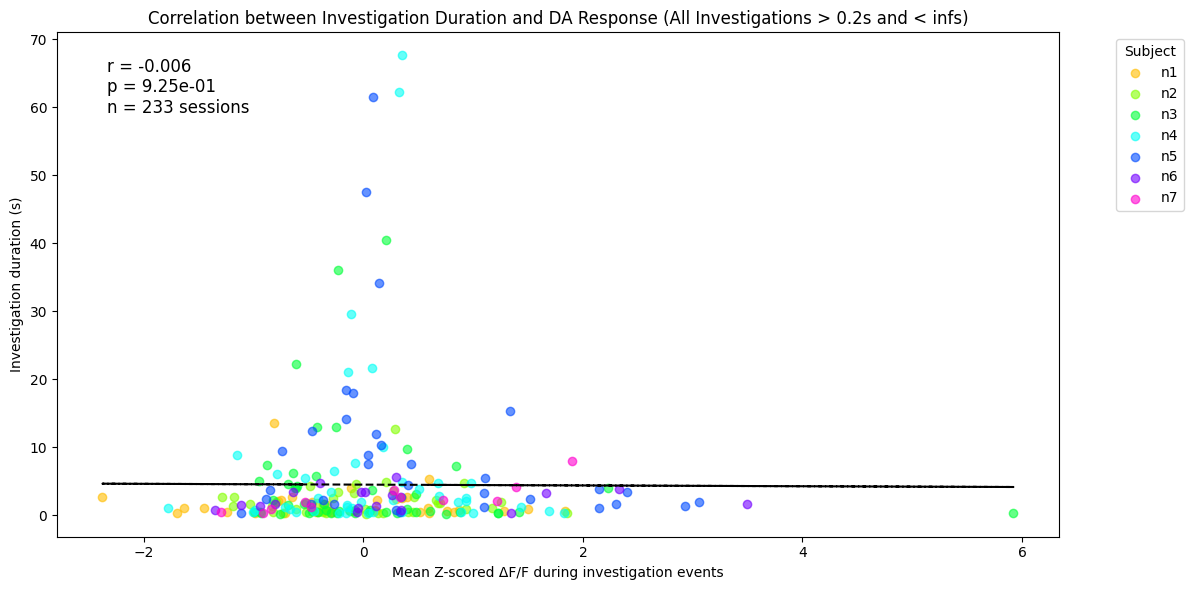

In [15]:
group_data.plot_all_behavior_vs_dff_all(behavior_name='Investigation', min_duration=0.2, max_duration=np.inf)

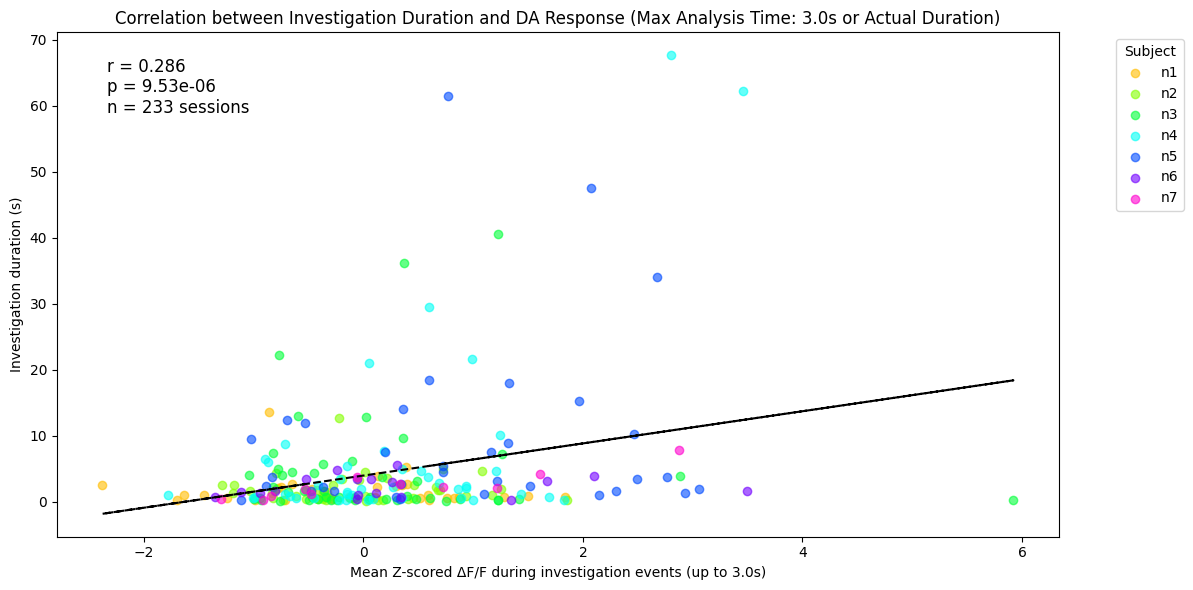

In [16]:
group_data.plot_all_behavior_vs_dff_all_with_flexible_time(behavior_name='Investigation', min_duration=0.1, max_analysis_time=3.0)

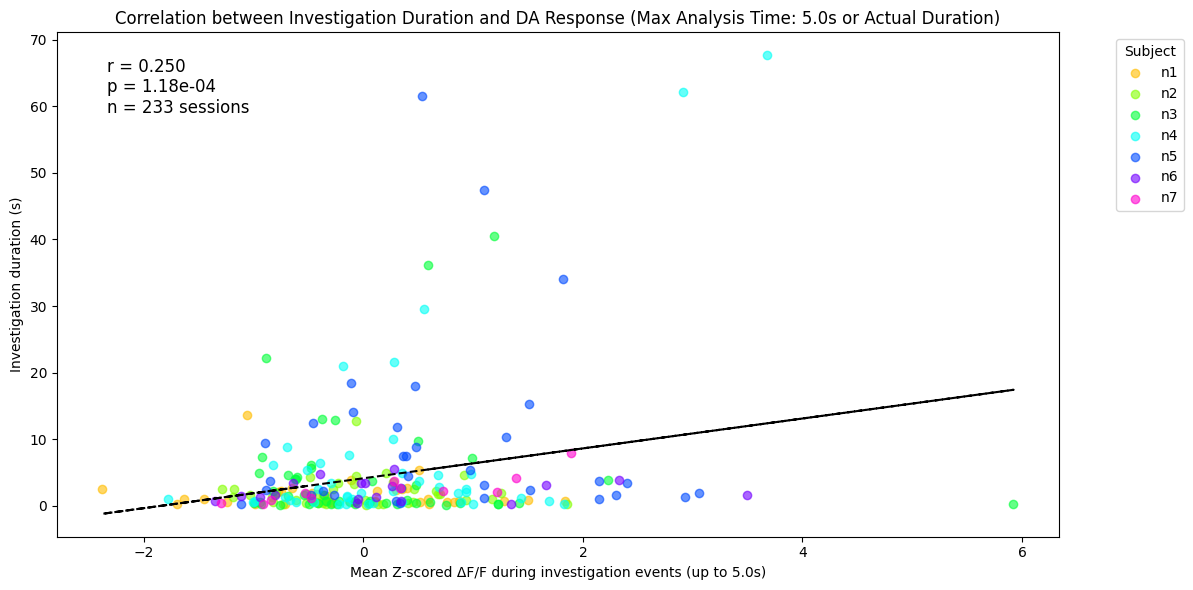

In [17]:
group_data.plot_all_behavior_vs_dff_all_with_flexible_time(behavior_name='Investigation', min_duration=0.1, max_analysis_time=5.0)

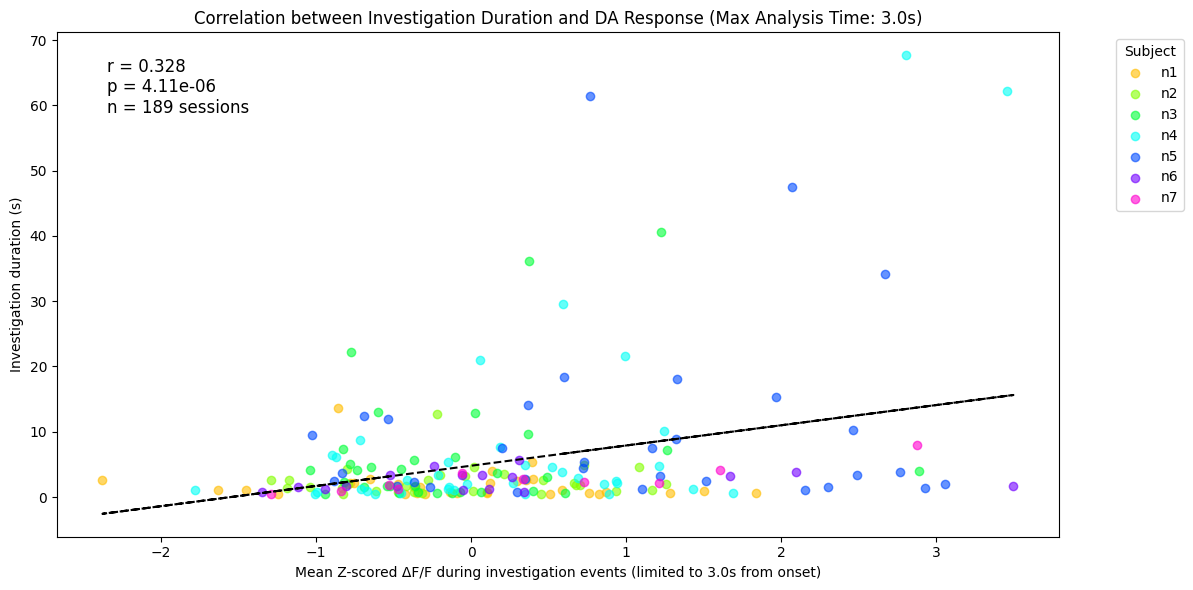

In [18]:
group_data.plot_all_behavior_vs_dff_all_max_time(behavior_name='Investigation', min_duration=0.5, max_analysis_time=3.0)


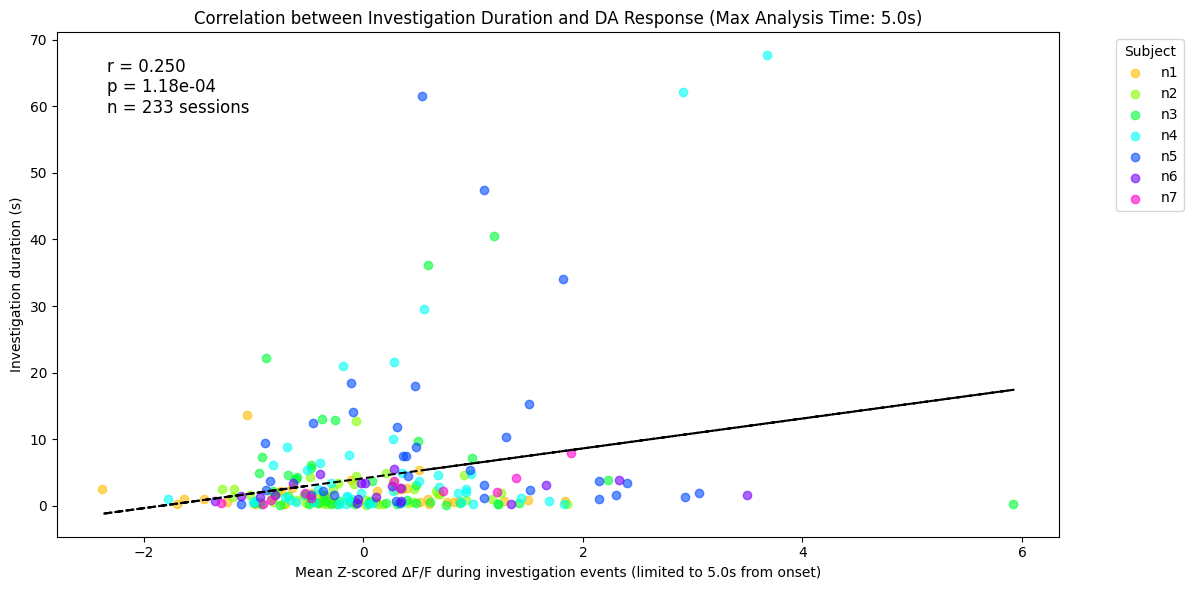

In [19]:
group_data.plot_all_behavior_vs_dff_all_max_time(behavior_name='Investigation', min_duration=0.0, max_analysis_time=5.0)


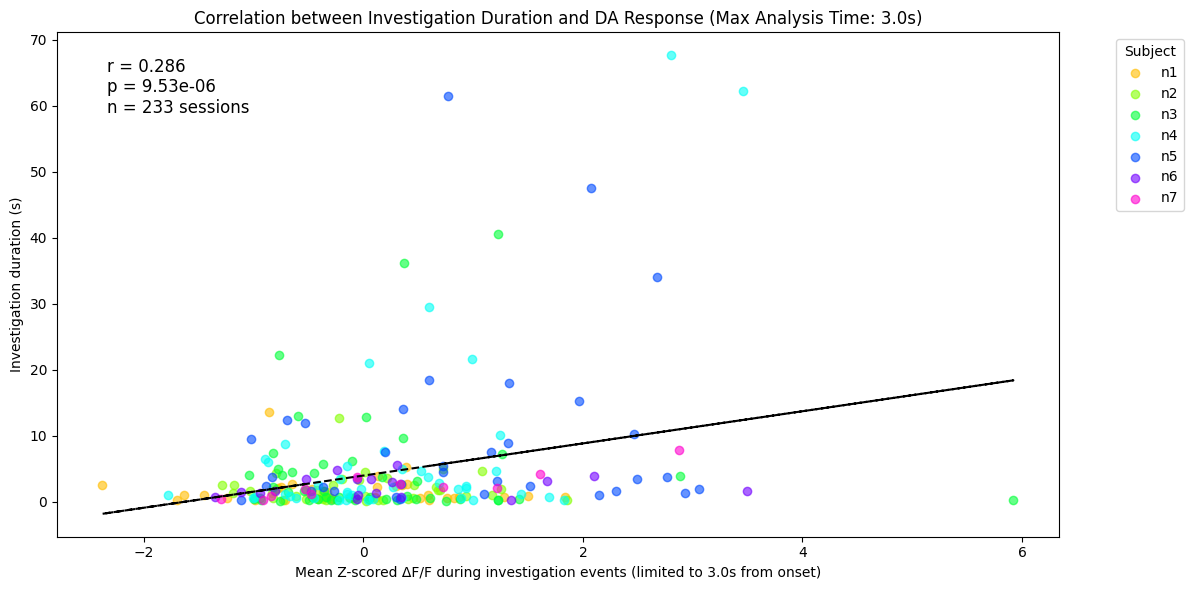

In [20]:
group_data.plot_all_behavior_vs_dff_all_max_time(behavior_name='Investigation', min_duration=0.0, max_analysis_time=3.0)


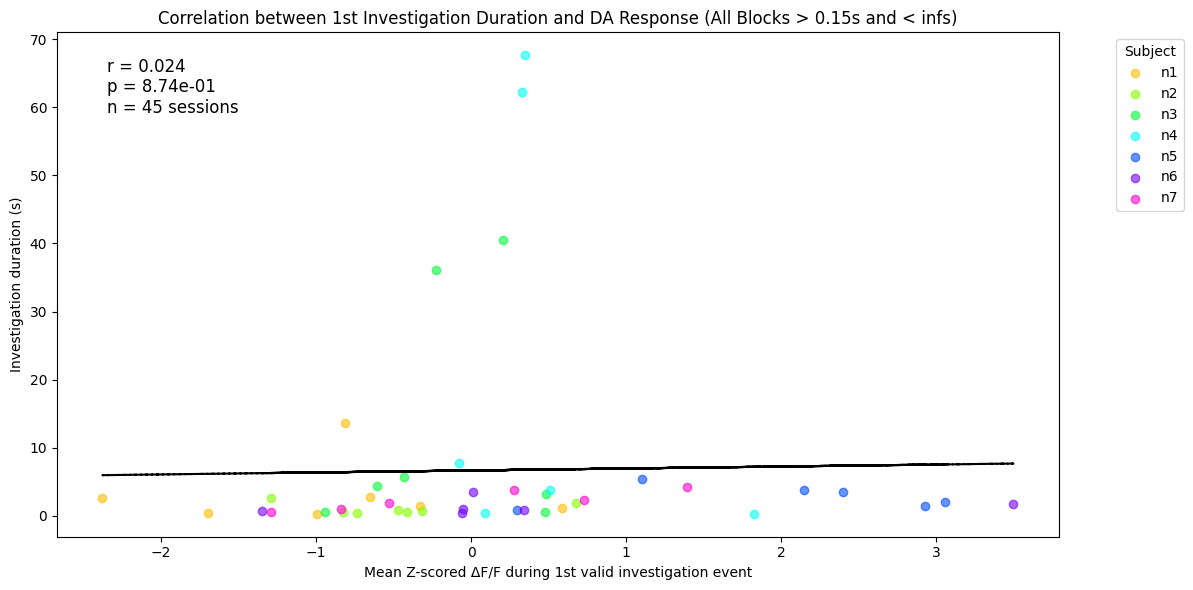

In [21]:
group_data.plot_1st_behavior_vs_dff_all( behavior_name='Investigation', min_duration=0.15, max_duration=np.inf)

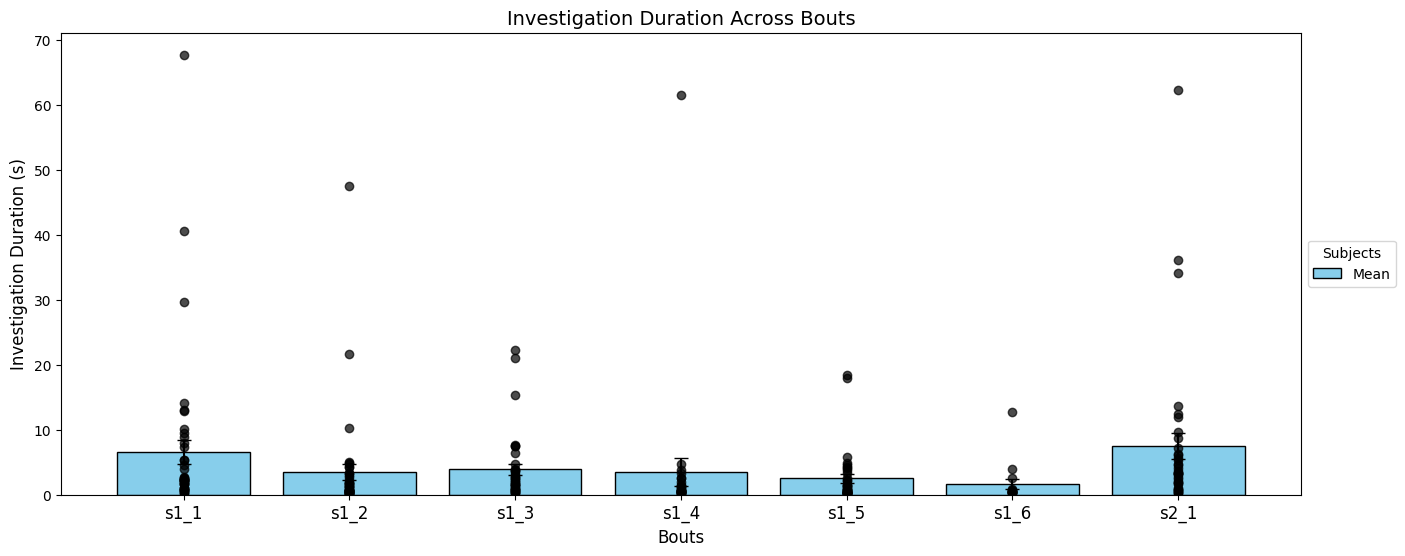

In [22]:
group_data.plot_behavior_durations_boutwise(behavior_name='Investigation', min_duration=0)

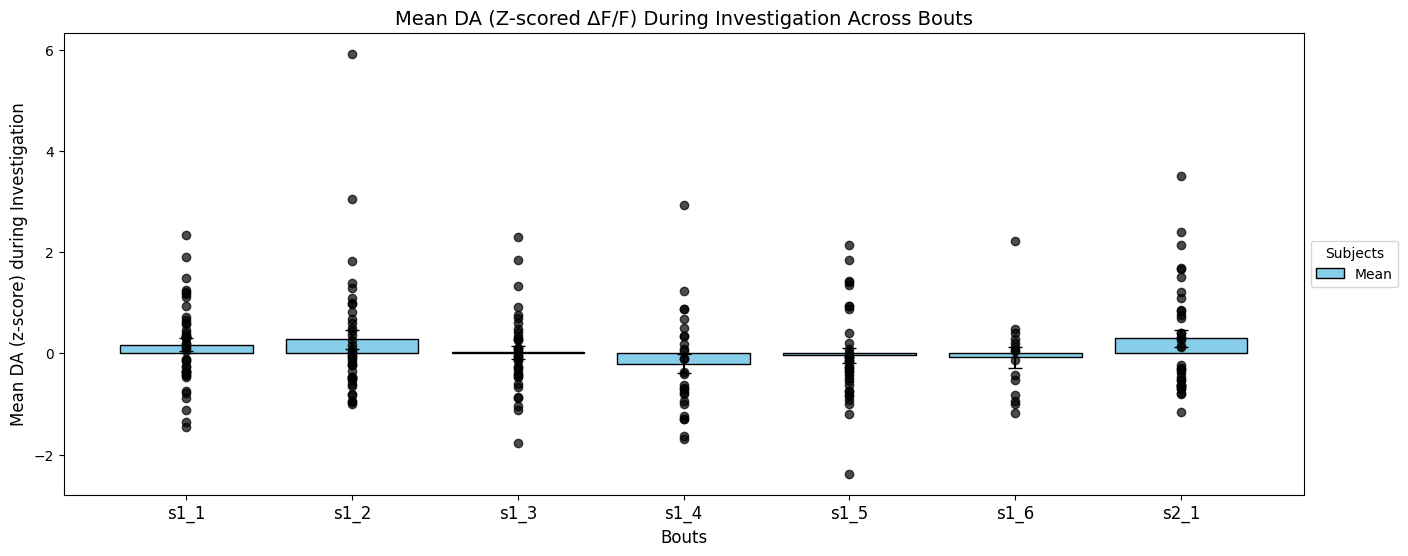

In [23]:
group_data.plot_behavior_mean_DA_boutwise(behavior_name='Investigation', min_duration=0)


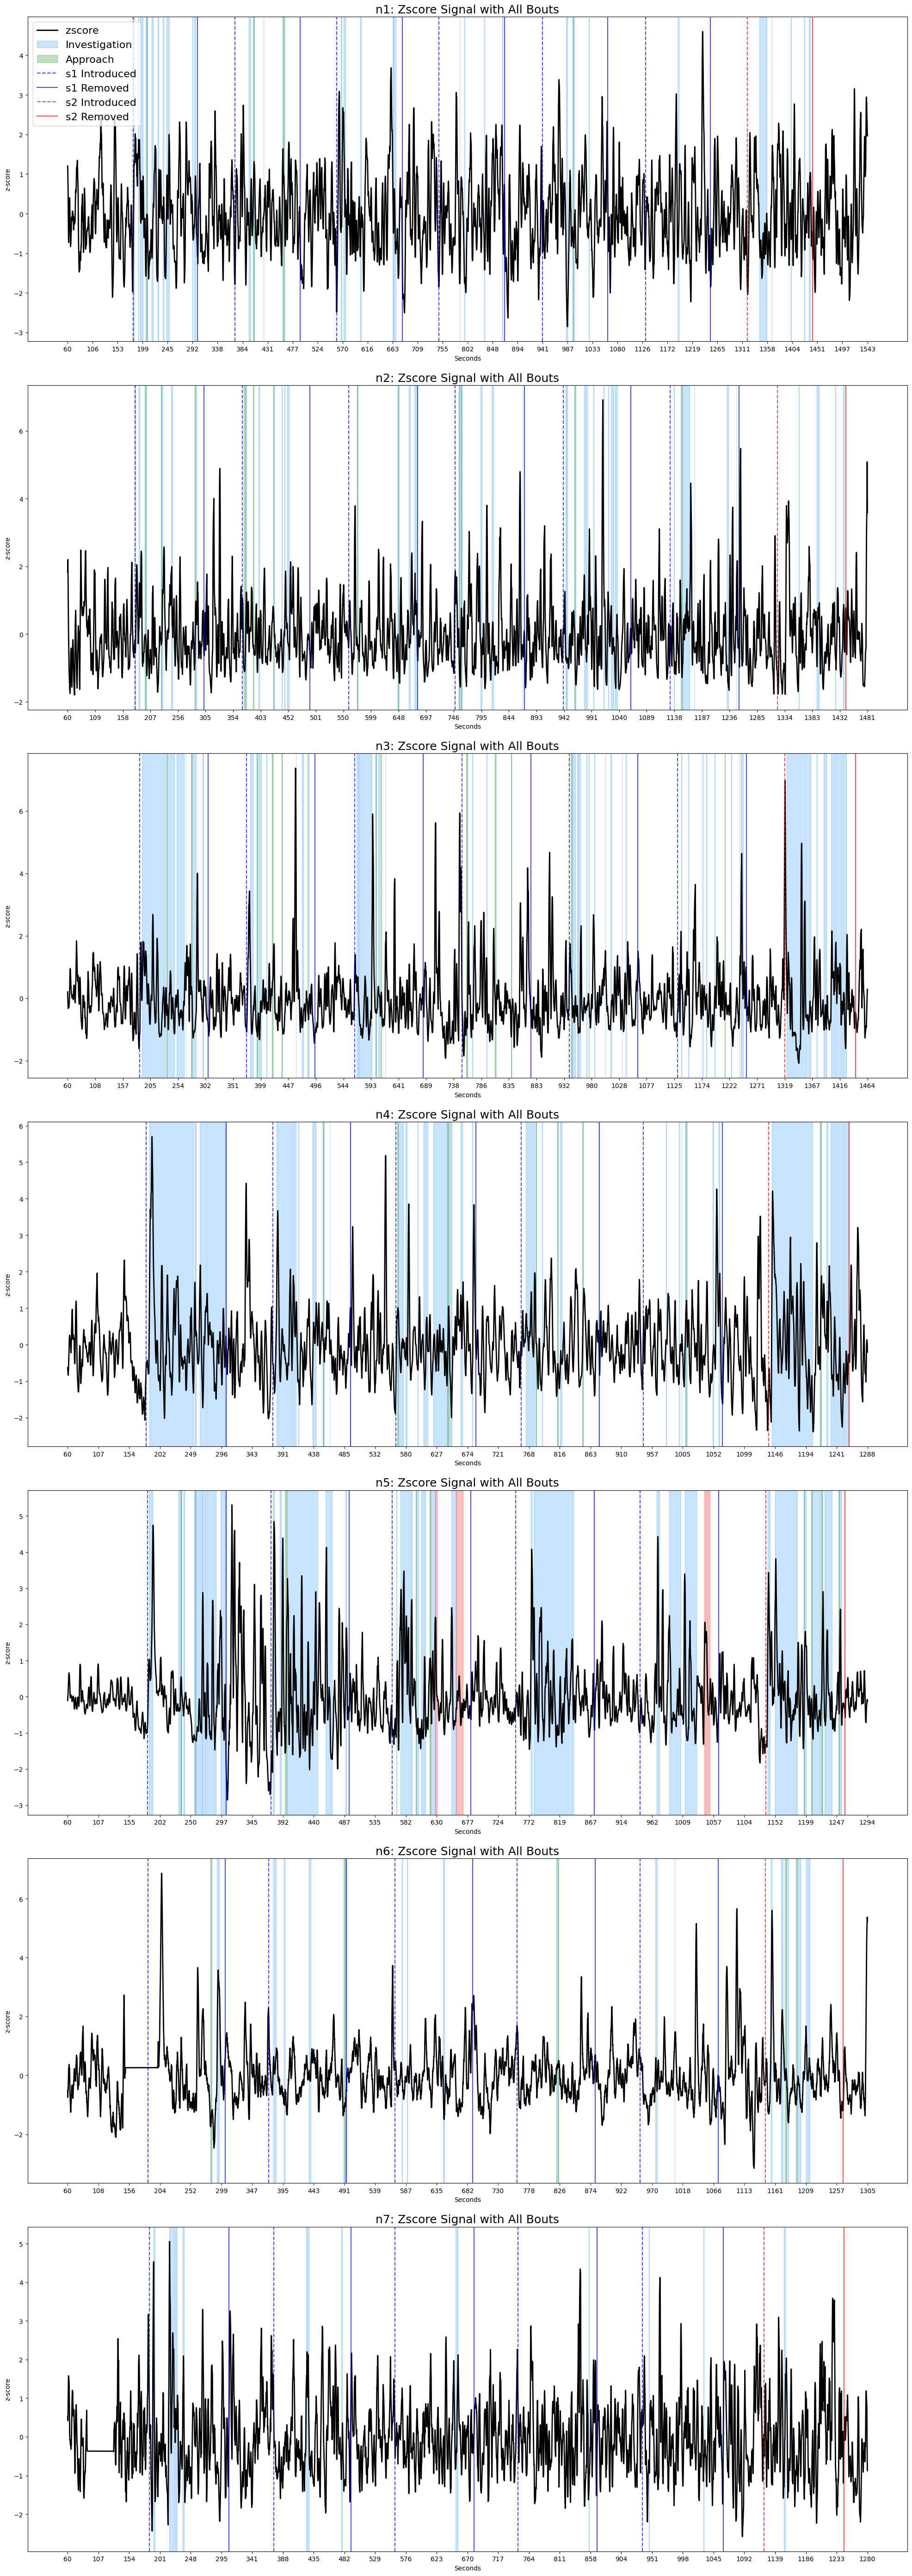

In [24]:
group_data.hab_dishab_plot_individual_behavior(behavior_name='all',plot_type='zscore',figsize=(20,8))